<a href="https://colab.research.google.com/github/bhartikapoor9634/Machine-Learning-Projects/blob/main/startup_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from imblearn import under_sampling, over_sampling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


In [ ]:
data = pd.read_csv('startup data.csv')
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


# **Check Dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [ ]:
data.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


# **Data Preprocessing**

**Check for missing values and duplicated data**

In [ ]:
data.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [ ]:
data_missing_value = data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,closed_at,588,63.71
1,Unnamed: 6,493,53.41
2,age_last_milestone_year,152,16.47
3,age_first_milestone_year,152,16.47
4,state_code.1,1,0.11


There are 5 missing value in this dataset, namely 'closed_at', 'Unnamed:6', 'age_last_milestone_year', 'age_first_milestone_year', and 'state_code.1'

First, drop column Unnamed:6 and state_code.1 because this is useless features

In [ ]:
data = data.drop(['Unnamed: 6'], axis=1)
data = data.drop(['state_code.1'], axis=1)

In [ ]:
data.duplicated().sum()

0

there is no duplicated data. But if we check the duplicated data with subset name, that will appear 1 duplicated data. Drop it

In [ ]:
data.duplicated(subset=['name']).sum()

1

In [ ]:
data=data.drop_duplicates(subset=['name'])

Now we fill column 'age_first_milestone_year' and 'age_last_milestone_year' with 0. Zero is the the smallest value assumption for a company that has not passed its first milestone

In [ ]:
data['age_first_milestone_year'] = data['age_first_milestone_year'].fillna(0)
data['age_last_milestone_year'] = data['age_last_milestone_year'].fillna(0)

**Add new feature 'Age'.**

In [ ]:
data['closed_at'] = pd.to_datetime(data['closed_at'])
data['founded_at'] = pd.to_datetime(data['founded_at'])
#convert to datetime data

data['last_date']=data['closed_at'] #copy data
data['last_date']=data['last_date'].fillna('2013-12-31')
data['last_date']=pd.to_datetime(data['last_date'])

We fill column last_date with 2013-12-31 with assumption that is the last number of dataset 

In [ ]:
data["founded_at"] = pd.to_datetime(data["founded_at"])

data["age"] = (data["last_date"]-data["founded_at"])
data["age"]=round(data.age/np.timedelta64(1,'Y'))

If we check it, there is minus number in here. Drop minus number

In [ ]:
data[[ 'age', 'age_first_funding_year','age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year']].sort_values('age').head()

,age,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year
88,-8.0,0.8822,0.8822,0.0000,0.0000
558,-4.0,-9.0466,-9.0466,-6.0466,-3.8822
73,-2.0,1.6685,9.3370,7.3808,10.4740
350,0.0,0.3288,0.3288,-0.4192,-0.4192
690,0.0,0.0000,0.6904,0.0000,0.6904


In [ ]:
data=data.drop(data[data.age<0].index)
data=data.drop(data[data.age_first_funding_year<0].index)
data=data.drop(data[data.age_last_funding_year<0].index)
data=data.drop(data[data.age_first_milestone_year<0].index)
data=data.drop(data[data.age_last_milestone_year<0].index)

Now we check for distribution, there is some features with skewness disribution more than 2. Handling it with normalization.

In [ ]:
features = ['age_first_funding_year', 'relationships','funding_total_usd',
            'age_last_funding_year','age_first_milestone_year', 
            'age_last_milestone_year', 'funding_rounds', 
            'milestones','avg_participants', 'age']
data[features].skew(axis=0, skipna=True)>2

age_first_funding_year       True
relationships                True
funding_total_usd            True
age_last_funding_year       False
age_first_milestone_year    False
age_last_milestone_year     False
funding_rounds              False
milestones                  False
avg_participants            False
age                         False
dtype: bool

In [ ]:
norm = ['age_first_funding_year', 'relationships', 'funding_total_usd']
data = data
for var in norm:
    data['norm_'+var]=MinMaxScaler().fit_transform(data[var].values.reshape(len(data),1))

# **Data Visualization**

In [ ]:

import plotly.express as px
#Analysing Target Variable
lis=['Acquired','Closed']
tar_var = data["labels"].value_counts().tolist()
val = [tar_var[0], tar_var[1]]
fig = px.pie(values=data["labels"].value_counts(), 
             names=lis , width=800, height=400, color_discrete_sequence=["orange","green"]
             ,title="Distribution of Target Varaible")
fig.show()

In [ ]:
data_grp_3=data[data['labels']==1].groupby(['age']).agg({'labels':'count'}).reset_index()
data_grp_3.columns=['age','total_succes']

data_grp_4=data.groupby(['age']).agg({'labels':'count'}).reset_index()
data_grp_4.columns=['age','total']

data_grp_3=data_grp_3.merge(data_grp_4,
                           on='age')
data_grp_3['succes_rate']=round((data_grp_3['total_succes']/data_grp_3['total'])*100,2)

data_grp_3


,age,total_succes,total,succes_rate
0,2.0,8,38,21.05
1,3.0,16,53,30.19
2,4.0,36,68,52.94
3,5.0,51,83,61.45
4,6.0,58,82,70.73
5,7.0,54,85,63.53
6,8.0,56,73,76.71
7,9.0,66,85,77.65
8,10.0,41,53,77.36
9,11.0,43,52,82.69


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

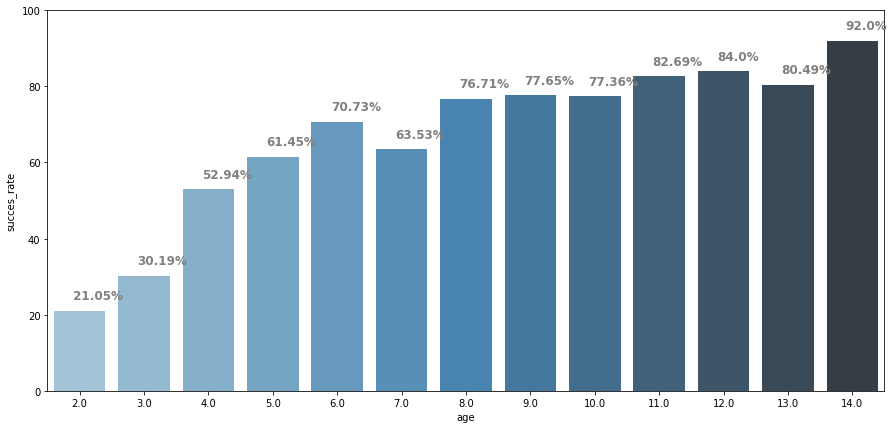

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'age',y='succes_rate',data=data_grp_3,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(data_grp_3))
y = data_grp_3['succes_rate']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+3, str(v)+'%', fontsize = 12, color='gray', fontweight='bold')
    
title = '''

'''
ax.text(2.80,30,title,horizontalalignment='left',color='black',fontsize=12,fontweight='bold')
    

text = '''

'''
ax.text(0.5,50,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')
    
ax.set_ylim(0,100)

ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
plt.tight_layout

1. Business insight from age : startups that have lifespan of more than 4 years have a tendency to be successful startup (more than 52%)

In [ ]:
data_grp_5=data[data['labels']==1].groupby(['milestones']).agg({'labels':'count'}).reset_index()
data_grp_5.columns=['milestones','total_succes']

data_grp_6=data.groupby(['milestones']).agg({'labels':'count'}).reset_index()
data_grp_6.columns=['milestones','total']

data_grp_5=data_grp_5.merge(data_grp_6,
                           on='milestones')
data_grp_5['succes_rate']=round((data_grp_5['total_succes']/data_grp_5['total'])*100,2)

data_grp_5

,milestones,total_succes,total,succes_rate
0,0,46,143,32.17
1,1,140,230,60.87
2,2,160,217,73.73
3,3,135,164,82.32
4,4,43,54,79.63
5,5,22,24,91.67
6,6,3,4,75.00
7,8,1,1,100.00


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

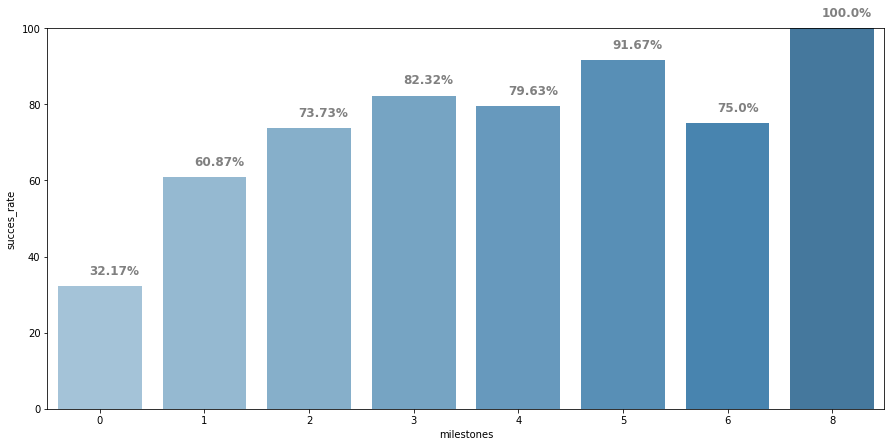

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x = 'milestones',y='succes_rate',data=data_grp_5,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(data_grp_5))
y = data_grp_5['succes_rate']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+3, str(v)+'%', fontsize = 12, color='gray', fontweight='bold')
    
title = '''

'''
ax.text(2.80,30,title,horizontalalignment='left',color='black',fontsize=12,fontweight='bold')
    

text = '''

'''
ax.text(0.5,50,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')
    
ax.set_ylim(0,100)

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout

2. Business insight from milestone : Startups that have min 1 milestone has potential to be successful startup (more than 60%)

In [ ]:
data['Relationships Range'] = data['relationships'].apply(lambda x : 'relationship 0' if x==0 else 'relationships >10' if x>10 else 'relationships 1-10' )
data20 = data.groupby(['Relationships Range', 'labels']).agg({'id' : 'count'}).reset_index()
data20_pv = pd.pivot_table(data20,
                          index=['Relationships Range'],
                          columns=['labels'],
                          values=['id']).reset_index()
data20_pv.columns = ['Relationships Range', 'Closed', 'Acquired']
data20_pv['Total Company'] = data20_pv['Closed']+data20_pv['Acquired']
data20_pv['Success Rate'] = round(data20_pv['Acquired']/data20_pv['Total Company']*100,2)
data20_pv


,Relationships Range,Closed,Acquired,Total Company,Success Rate
0,relationship 0,33,3,36,8.33
1,relationships 1-10,233,371,604,61.42
2,relationships >10,21,176,197,89.34


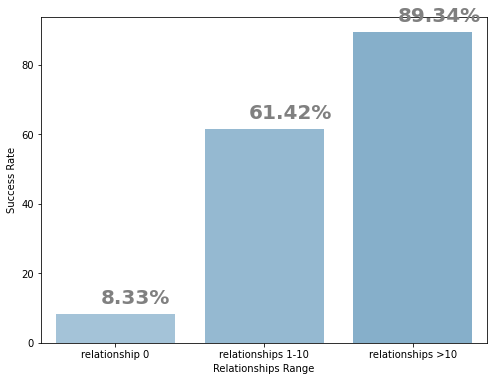

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

g = sns.barplot(x = 'Relationships Range',y='Success Rate',data=data20_pv,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=13, desat=1))

x = np.arange(len(data20_pv['Relationships Range']))
y = data20_pv['Success Rate']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+3, str(v)+'%', fontsize = 20, color='gray', fontweight='bold')
  
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

3. Business insigt from relationship: startups with relationships more than 1 has potential to be successful startup (more than 61%)

# **Training and Test Data**

In [ ]:
# Split Feature Vector and Label
X = data[['norm_relationships', 'norm_age_first_funding_year','norm_funding_total_usd',
          
          'age_last_funding_year',
          'age_first_milestone_year', 'age_last_milestone_year', 
          'funding_rounds', 'milestones','age',

          'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 
          'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 
          'is_ecommerce', 'is_biotech', 'is_consulting','is_othercategory', 
          'has_VC', 'has_angel', 'has_roundA','has_roundB', 'has_roundC', 'has_roundD', 
          'avg_participants','is_top500'
          ]]
y = data['labels'] # target / label

#Splitting the data into Train and Test
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)

In [ ]:
print("Before Resampling in Train Data :")
print(y_train.value_counts())

print("Before Sampling in Test Data: ")
print(y_test.value_counts())



Before Resampling in Train Data :
1    395
0    190
Name: labels, dtype: int64
Before Sampling in Test Data: 
1    155
0     97
Name: labels, dtype: int64


In [ ]:
X_train_up, y_train_up = over_sampling.RandomOverSampler(random_state=42).fit_resample(X_train, y_train)

In [ ]:
print("After Resampling :")
print(y_train_up.value_counts())

print("After Resampling in Test Data")
print(y_test.value_counts())

After Resampling :
0    395
1    395
Name: labels, dtype: int64
After Resampling in Test Data
1    155
0     97
Name: labels, dtype: int64


# **Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train_up, y_train_up)
y_predicted_nb = nb.predict(X_test)
y_predicted_train_nb = nb.predict(X_train_up)

print('\nconfusion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predicted_nb))
print('\naccuracy')
print(accuracy_score(y_test, y_predicted_nb))
print('\nclassification report')
print(classification_report(y_test, y_predicted_nb)) # generate the precision, recall, f-1 score, num
roc_auc_score(y_test, y_predicted_nb)
print('AUC Score:',roc_auc_score(y_test, y_predicted_nb))


confusion matrix
[[81 16]
 [61 94]]

accuracy
0.6944444444444444

classification report
              precision    recall  f1-score   support

           0       0.57      0.84      0.68        97
           1       0.85      0.61      0.71       155

    accuracy                           0.69       252
   macro avg       0.71      0.72      0.69       252
weighted avg       0.75      0.69      0.70       252

AUC Score: 0.7207515796474893


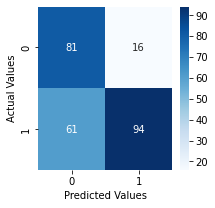

In [ ]:
plt.rcParams['figure.figsize'] = (3, 3)
cm_nb= confusion_matrix(y_test, y_predicted_nb)
sns.heatmap(cm_nb, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=10000)
rf.fit(X_train_up, y_train_up)
y_predicted_rf = rf.predict(X_test)
y_predicted_train_rf = rf.predict(X_train_up)

print('\nconfusion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predicted_rf))
print('\naccuracy')
print(accuracy_score(y_test, y_predicted_rf))
print('\nclassification report')
print(classification_report(y_test, y_predicted_rf)) # generate the precision, recall, f-1 score, num
roc_auc_score(y_test, y_predicted_rf)
print('AUC Score:',roc_auc_score(y_test, y_predicted_rf))


confusion matrix
[[ 66  31]
 [ 15 140]]

accuracy
0.8174603174603174

classification report
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        97
           1       0.82      0.90      0.86       155

    accuracy                           0.82       252
   macro avg       0.82      0.79      0.80       252
weighted avg       0.82      0.82      0.81       252

AUC Score: 0.7918190887928167


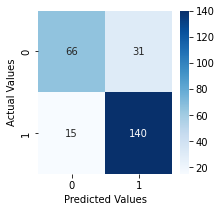

In [ ]:
plt.rcParams['figure.figsize'] = (3, 3)
cm_rf= confusion_matrix(y_test, y_predicted_rf)
sns.heatmap(cm_rf, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(class_weight='balanced',max_depth=10000)
dt.fit(X_train_up, y_train_up)
y_predicted_dt = dt.predict(X_test)
y_predicted_train_dt = dt.predict(X_train_up)

print('\nconfusion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predicted_dt))
print('\naccuracy')
print(accuracy_score(y_test, y_predicted_dt))
print('\nclassification report')
print(classification_report(y_test, y_predicted_dt)) # generate the precision, recall, f-1 score, num
roc_auc_score(y_test, y_predicted_dt)
print('AUC Score:',roc_auc_score(y_test, y_predicted_dt))


confusion matrix
[[ 66  31]
 [ 31 124]]

accuracy
0.753968253968254

classification report
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        97
           1       0.80      0.80      0.80       155

    accuracy                           0.75       252
   macro avg       0.74      0.74      0.74       252
weighted avg       0.75      0.75      0.75       252

AUC Score: 0.7402061855670103


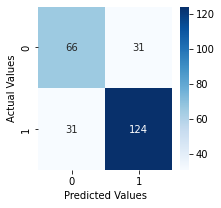

In [ ]:
plt.rcParams['figure.figsize'] = (3, 3)
cm_dt= confusion_matrix(y_test, y_predicted_dt)
sns.heatmap(cm_dt, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **Extreme Gradient Boost**

In [ ]:
import xgboost
xg= xgboost.XGBClassifier()
xg.fit(X_train_up, y_train_up)
y_predicted_xg = xg.predict(X_test)
y_predicted_train_xg = xg.predict(X_train_up)

print('\nconfusion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predicted_xg))
print('\naccuracy')
print(accuracy_score(y_test, y_predicted_xg))
print('\nclassification report')
print(classification_report(y_test, y_predicted_xg)) # generate the precision, recall, f-1 score, num
roc_auc_score(y_test, y_predicted_xg)
print('AUC Score:',roc_auc_score(y_test, y_predicted_xg))


confusion matrix
[[ 74  23]
 [ 19 136]]

accuracy
0.8333333333333334

classification report
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        97
           1       0.86      0.88      0.87       155

    accuracy                           0.83       252
   macro avg       0.83      0.82      0.82       252
weighted avg       0.83      0.83      0.83       252

AUC Score: 0.820152976388427


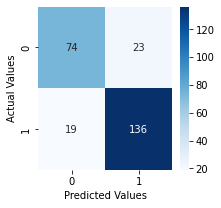

In [ ]:
plt.rcParams['figure.figsize'] = (3, 3)
cm_xg= confusion_matrix(y_test, y_predicted_xg)
sns.heatmap(cm_xg, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **Modeling with AdaBoost**

In [ ]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train_up, y_train_up)
y_predicted = ab.predict(X_test)
y_predicted_train = ab.predict(X_train_up)

print('\nconfusion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predicted))
print('\naccuracy')
print(accuracy_score(y_test, y_predicted))
print('\nclassification report')
print(classification_report(y_test, y_predicted)) # generate the precision, recall, f-1 score, num
roc_auc_score(y_test, y_predicted)

regression = AdaBoostClassifier(random_state=42)
regression.fit(X_train, y_train)
print("Train Accuracy:",regression.score(X_train, y_train))
print("Test Accuracy:",regression.score(X_test, y_test))

roc_auc_score(y_test, y_predicted)
print('AUC Score:',roc_auc_score(y_test, y_predicted))



confusion matrix
[[ 78  19]
 [ 21 134]]

accuracy
0.8412698412698413

classification report
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        97
           1       0.88      0.86      0.87       155

    accuracy                           0.84       252
   macro avg       0.83      0.83      0.83       252
weighted avg       0.84      0.84      0.84       252

Train Accuracy: 0.8666666666666667
Test Accuracy: 0.8253968253968254
AUC Score: 0.8343199201862321


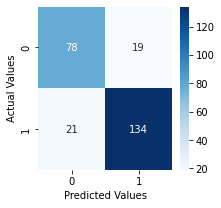

In [ ]:
plt.rcParams['figure.figsize'] = (3, 3)
cm_ab= confusion_matrix(y_test, y_predicted)
sns.heatmap(cm_ab, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **Features Importances**

Text(0.5, 1.0, 'feature importance score')

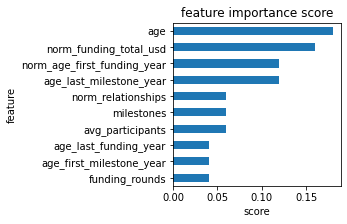

In [ ]:
feat_importances = pd.Series(ab.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

# **Business Simulation**

In [ ]:
y_predicted=pd.DataFrame(y_predicted)
y_test=pd.DataFrame(y_test)

y_test=y_test.reset_index()
y_test=y_test.drop(['index'],axis=1)

X_test['funding_total_usd']=data['funding_total_usd']
X_test=X_test.reset_index()
X_test=X_test.drop(['index'],axis=1)

X_test['y_predicted']=y_predicted
X_test['y_test']=y_test
X_test.head()

,norm_relationships,norm_age_first_funding_year,norm_funding_total_usd,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,funding_rounds,milestones,age,is_CA,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,funding_total_usd,y_predicted,y_test
0,0.111111,0.091465,0.005261,4.3863,1.5836,4.1918,4,2,9.0,0,...,1,1,1,0,0,2.0000,1,30000000,1,0
1,0.412698,0.038039,0.009647,3.9370,3.4822,7.6658,4,5,9.0,1,...,0,1,1,1,1,2.7500,1,55000000,1,1
2,0.031746,0.360236,0.007489,10.6658,0.4137,0.4137,3,1,12.0,0,...,0,0,1,0,0,3.6667,1,42700000,0,0
3,0.015873,0.082458,0.000524,1.8055,0.0000,0.0000,1,0,2.0,0,...,0,1,0,0,0,1.0000,1,3000000,0,0
4,0.111111,0.005257,0.007367,1.1507,0.0000,0.0000,3,0,14.0,0,...,0,1,1,1,0,2.6667,1,42000000,1,1


Total Fail in start up:

In [ ]:
y_test[y_test['labels']==0].count()

labels    97
dtype: int64

Predict True Fail Startup (True Negatif):

In [ ]:
X_test[(X_test['y_test']==0)&(X_test['y_predicted']==0)]['y_predicted'].count()

78

Total Success in startup:

In [ ]:
y_test[y_test['labels']==1].count()

labels    155
dtype: int64

Predict True Success Startup(True Positif):

In [ ]:
X_test[(X_test['y_test']==1)&(X_test['y_predicted']==1)]['y_predicted'].count()

134

**Total Invest without ML:**

In [ ]:
X_test['funding_total_usd'].sum()

5095709923

If we Invest without ML AdaBoost it will cost 5 Billion USD

**Total Invest with ML:**

In [ ]:
X_test[(X_test['y_predicted']==1)]['funding_total_usd'].sum()

3355072615

If we invest with AdaBoost, it will cost 3.3 Billion USD. It's 34% effieciency invesment

**Potential Loss without ML:**

In [ ]:
X_test[(X_test['y_test']==0)]['funding_total_usd'].sum()

1818320216

Without AdaBoost, potential loss investment is 1.8 Billion USD

**Potential Loss With ML:**

In [ ]:
X_test[(X_test['y_test']==0)&(X_test['y_predicted']==1)]['funding_total_usd'].sum()

317934826

With AdaBoost, potential loss is reducting until 82%. It just cost 300 Million USD

**Saving Fund Investment with predict ML:**

In [ ]:
X_test[(X_test['y_test']==0)&(X_test['y_predicted']==0)]['funding_total_usd'].sum()

1500385390

With ML AdaBoost, we are saving 1.5 Billion USD